Part One

Adam Weinstein
u0747284
5.31.2022
CS6017
HW2

Perform a hypothesis test using the two-proportion z-value test.  See the "pooled" version from the table here (Links to an external site.) statistic at both the 5% and 1% signficance levels.

Begin by formulating and writing down your null hypothesis: We have two samples – A and B. Our null hypothesis is that the proportions from the two populations are the same. H0: μ1 = μ2 (the two population proportions are equal)

Our alternative hypothesis is that the proportions from the two populations are different
From one population we sampled 1000 tests and found 500 said yes
From the other population, we sampled 1000 tests and found 550 said yes

We use a 2-sample z-test to check if the sample allows us to accept or reject the null hypothesis:

z = (p1-p2) / √p(1-p)(1/n1+1/n2)

where p1 and p2 are the sample proportions, n1 and n2 are the sample sizes, and where p is the total pooled proportion calculated as:

p = (p1n1 + p2n2)/(n1+n2)

If the p-value that corresponds to the test statistic z is less than your chosen significance level (common choices are 0.10, 0.05, and 0.01) then you can reject the null hpothesis.

Null hypothesis: the proportions from the 2 pops are the same
Alternative: the proportions are different

In [ ]:
import math

p1 = 550/1000
p2 = 500/1000
n1 = 1000
n2 = 1000
p = 1050/2000
p_val = ( ((p1*n1)+(p2*n2)) / (n1+n2) )

divisor = (p1-p2) - 0
dividend = math.sqrt( p * (1-p) * ( (1/n1)+(1/n2) ) )
z = divisor/dividend

print (f"the total pooled proportion value is: {p}")
print (f"the p value is {p_val}")
print(f"the z value is: {z}")

At 5% significance levels we can reject the null hypothesis. At 1% we reject it.

In [ ]:
p1 = 560/1000
p2 = 500/1000
n1 = 1000
n2 = 1000
p = 1050/2000
p_val = ( ((p1*n1)+(p2*n2)) / (n1+n2) )

divisor = (p1-p2) - 0
dividend = math.sqrt( p * (1-p) * ( (1/n1)+(1/n2) ) )
z = divisor/dividend

print (f"the total pooled proportion value is: {p}")
print (f"the p value is {p_val}")
print(f"the z value is: {z}")

In [ ]:
p1 = 570/1000
p2 = 500/1000
n1 = 1000
n2 = 1000
p = 1050/2000
p_val = ( ((p1*n1)+(p2*n2)) / (n1+n2) )

divisor = (p1-p2) - 0
dividend = math.sqrt( p * (1-p) * ( (1/n1)+(1/n2) ) )
z = divisor/dividend

print (f"the total pooled proportion value is: {p}")
print (f"the p value is {p_val}")
print(f"the z value is: {z}")

In [ ]:

import matplotlib.pyplot as plt

n1 = 1000
n2 = 1000
zs = [0]
ps = [0]
offset = 100
offsets = [0]

for set_size in range (500, 700, 1):
    p1 = set_size/n1
    p2 = (set_size + offset ) /n2
    p = (set_size + set_size + offset) / (n1 + n2)
    divisor = (p1-p2) - 0
    dividend = math.sqrt( p * (1-p) * ( (1/n1)+(1/n2) ) )
    z = divisor/dividend
    zs.append( z )
    ps.append( p )
    offsets.append( set_size+offset)

#plt.plot( ps, offsets )
plt.xlabel("offsets")
plt.ylabel("ps")
plt.plot( offsets, ps)


In [ ]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# can we assume anything from our sample
significance = 0.025

# samples
sample_success_a, sample_size_a = (500, 1000)
sample_success_b, sample_size_b = (550, 1000)

successes = np.array([sample_success_a, sample_success_b])
samples = np.array([sample_size_a, sample_size_b])

z_stat, p_value = proportions_ztest(count=successes, nobs=samples, alternative='two-sided')

print('z_stat: %0.3f, p_value: %0.3f' % (z_stat, p_value))

two-sided value:

In [ ]:
z_stat2, p_value2 = proportions_ztest(count=successes, nobs=samples, alternative='two-sided')

print('z_stat2: %0.3f, p_value2: %0.3f' % (z_stat2, p_value2))


What can you conclude? A z-score describes the position of a raw score in terms of its distance from the mean, when measured in standard deviation units. The z-score is positive if the value lies above the mean, and negative if it lies below the mean. In this case, the z score indicates we're below the mean. Because the p-value is so small, we can assume that the difference in numbers between sample one and two is not very significant. The +50 doesn't amount to a large change. 

PART TWO: Import the Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 4000
pd.options.display.max_columns = 300

#read in data from file
props_one = pd.read_csv( "realEstate1.csv" )
props_two = pd.read_csv( "realEstate2.csv" )

df_one = pd.DataFrame( props_one )
df_two = pd.DataFrame( props_two )

#concatenate two dfs by creating a frame, then call method
data = pd.concat([df_one, df_two])

#display( data )

data = data.reset_index(drop=True)


data.drop([4, 8, 11, 14,15, 20,21,23,24,27,28,30,37,43,45,51,54,61,62,69,71,83,84,87,88,89,91,92, 98,99, 100,101,118,123,124,125,129,140,144,148,149,150,152,157,168,176,178,179,184,191,205,206,209,216, 223, 243, 245, 252, 253, 256, 259])


data




Task 2: Clean the Data

In [ ]:

cleaned_data = data[["ListNo", "LstPrice" , "Longitude", "Latitude", "PropType", "Taxes", "Amenities", "City", 
"DaysOnMkt", "Floor", "LandScape", "TotSqf", "TotBed", "TotBth", "TotBthHal", "YearBlt", "Zip", "Remarks", 
"Roof", "SchDist", "Sewer", "SoldPrice", "Style", "Zoning", "YearBlt", "Acres", "Garage"]]




#Only keep houses with List Price between 200,000 and 1,000,000 dollars
price_match = cleaned_data.loc[ (cleaned_data ['LstPrice']>200000) & (cleaned_data['LstPrice']<1000000) ]


price_match

Convert 'TotSqf' to an integer

In [ ]:


counter = 0


for sqft in price_match.TotSqf:
    if isinstance(sqft, str):
         sqft = sqft.replace(",","")
         sqft = int( sqft )
         cleaned_data.at[ counter, 'TotSqf']= sqft
  




Add a new column titled Prop_Type_SingleFamily that is set to 0 if the i-th listing is a condo or townhouse, or 1 if the i-th listing is a single family house.

In [ ]:
import numpy as np



counter = 0
other = 0
single_family_count = 0

for prop_type in cleaned_data[ "PropType" ]:
    if prop_type == "Single Family":
        price_match.at[ counter, 'Prop_Type_SingleFamily'] = int(1)
        single_family_count += 1

    else:
        price_match.at[ counter, 'Prop_Type_SingleFamily'] = int(0)
        other += 1
    counter += 1

print (other)
print (single_family_count)





Remove the listings with erroneous 'Longitude' (one has Longitude = 0) and 'Taxes' values (two have unreasonably large values).

In [ ]:
pos_data = cleaned_data

pos_data = pos_data.loc[ cleaned_data["Longitude"] > -112.0 ]
pos_data = pos_data.loc[cleaned_data["Longitude"] <111.0]
pos_data = pos_data.loc[cleaned_data["Latitude"] > 40]
pos_data = pos_data.loc[cleaned_data["Latitude"] < 41]


pos_data = pos_data.loc[ cleaned_data["Taxes"] < 10000 ]







Task 3: Exploratory Data Analysis

The variables I've chosen are: "ListNo", "LstPrice" , "Longitude", "PropType", "Taxes", "Amenities", "City", 
"DaysOnMkt", "Floor", "LandScape", "TotSqf", "P5Bed", "TotBth", "TotBthHal", "YearBlt", "Zip", "Remarks", 
"Roof", "SchDist", "Sewer", "SoldPrice", "Style", "Zoning". If I were looking for a house, these are the features I would be most interested in. By eyeballing the data, it seems as if the strongest correlation is between price and sq.ft. 

In [ ]:
import matplotlib.pyplot as plt

condos = 0
single_familys = 0
townhouses = 0



for type in pos_data.PropType:
    if type == "Condo":
        condos += 1
    if type == "Single Family":
        single_familys += 1
    if type == "Townhouse":
        townhouses +=1

print( f"condos: {condos}")
print( f"single family: {single_familys}")
print( f"townhouses: {townhouses}")

df = pd.DataFrame( pos_data)
df = pd.DataFrame({'lab':['condo', 'single family', 'townhome'], 'number of units':[condos, single_familys, townhouses]})
ax = df.plot.bar(x='lab', y='number of units', rot=0, color='red')


Compute the correlation matrix and use a heat map to visualize the correlation coefficients.
Use a diverging color scale from -1 to +1 (see vmin and vmax parameters for pcolor (Links to an external site.))
Show a legend (colorbar (Links to an external site.))
Make sure the proper labels are visible and readable (see xticks (Links to an external site.) and the corresponding yticks (Links to an external site.)).

In [ ]:
import seaborn as sns

price_map = price_match[["Longitude", "Latitude", "LstPrice"]]

price_map_matrix = price_map.corr()

sns.heatmap(price_map_matrix, annot=True, vmin= -1, vmax= 1)

plt.show()

price_map

Task 4: Geospatial Plot

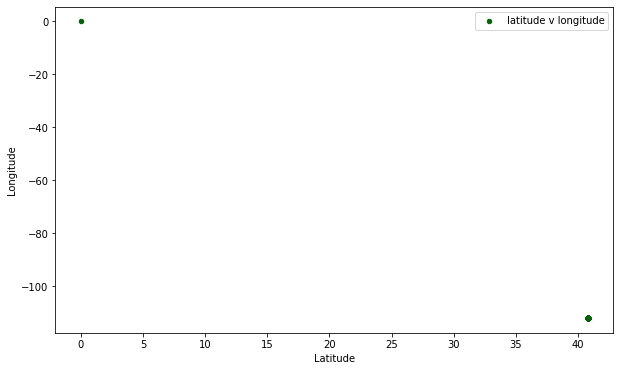

In [88]:


import matplotlib.pyplot as plt

#x latitude
#y long
# color of points based on home price



new_data = cleaned_data[["Latitude", "Longitude", "LstPrice" , "Acres", "SoldPrice", "Taxes", "TotBed", "TotSqf", "YearBlt", "Garage"]]



#plt.scatter( x=new_data['Latitude'], y=new_data['Longitude'], c=new_data['SoldPrice'], marker='*', label='Lat v Long', cmap='Blues')

ax = new_data.plot( kind='scatter', x='Latitude', y='Longitude', color='DarkGreen', label='latitude v longitude' )
plt.show()



What can we say about the above? It Seems as if the steepest prices, which are located in the northeast, which is closer to the mountains.

In [ ]:
print (price_match.Latitude)

Task 5: Simple Linear Regression

List Price v Sold Price:

In [89]:
# imports and setup

import scipy as sc
from   scipy.stats import norm
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm
from   sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [92]:
sold_v_list = sm.ols( formula="SoldPrice ~ LstPrice", data=cleaned_data ).fit() # ols == ordinary least squares
sold_v_list.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.862e+04
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:10:08   Log-Likelihood:                -4185.1
No. Observations:                 348   AIC:                             8374.
Df Residuals:                     346   BIC:                             8382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.898e+04   3317.775      8.733      0.000    2.25e+04    3.55e+04
LstPrice       0.9019      0.005    169.185      0.000       0.891       0.912
==============================================================================
Omnibus:                      555.043   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           233759.385
Skew:                          -8.301   Prob(JB):                         0.00
Kurtosis:                     128.880   Cond. No.                     9.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 R-squared: 0.990 R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. An R-squared of 100% means that all movements of dependent variable are completely explained by movements in the independent variable. In this case, .990 is almost 100%, meaning the correlation is very strong.


In [93]:
#PLOT Latitude v Longitude


data = price_match

ll = sm.ols( formula="Latitude ~ Longitude", data=cleaned_data ).fit() # ols == ordinary least squares
ll.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Latitude   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.455e+07
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:10:18   Log-Likelihood:                 1237.6
No. Observations:                 348   AIC:                            -2471.
Df Residuals:                     346   BIC:                            -2463.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002      0.007      0.027      0.979      -0.013       0.014
Longitude     -0.3645    6.2e-05  -5878.268      0.000      -0.365      -0.364
==============================================================================
Omnibus:                       14.372   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.449
Skew:                           0.506   Prob(JB):                     0.000442
Kurtosis:                       2.801   Cond. No.                     2.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
#PLOT TAXES V SOLD PRICE


data = price_match

sold_v_tax = sm.ols( formula="Taxes ~ SoldPrice", data=cleaned_data ).fit() # ols == ordinary least squares
sold_v_tax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Taxes   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     5.090
Date:                Mon, 08 Aug 2022   Prob (F-statistic):             0.0247
Time:                        11:10:28   Log-Likelihood:                -3890.1
No. Observations:                 348   AIC:                             7784.
Df Residuals:                     346   BIC:                             7792.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1534.4551   1472.409      1.042      0.298   -1361.544    4430.454
SoldPrice      0.0057      0.003      2.256      0.025       0.001       0.011
==============================================================================
Omnibus:                      772.854   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1167488.323
Skew:                          16.423   Prob(JB):                         0.00
Kurtosis:                     284.847   Cond. No.                     9.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:


#PLOT ZIP TO SOLD PRICE
data = price_match
sold_v_tax = sm.ols( formula="SoldPrice ~ LstPrice", data=cleaned_data ).fit() # ols == ordinary least squares
sold_v_tax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.862e+04
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:10:38   Log-Likelihood:                -4185.1
No. Observations:                 348   AIC:                             8374.
Df Residuals:                     346   BIC:                             8382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.898e+04   3317.775      8.733      0.000    2.25e+04    3.55e+04
LstPrice       0.9019      0.005    169.185      0.000       0.891       0.912
==============================================================================
Omnibus:                      555.043   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           233759.385
Skew:                          -8.301   Prob(JB):                         0.00
Kurtosis:                     128.880   Cond. No.                     9.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

           LstPrice  SoldPrice  Latitude
LstPrice   1.000000   0.994010  0.000086
SoldPrice  0.994010   1.000000 -0.001254
Latitude   0.000086  -0.001254  1.000000


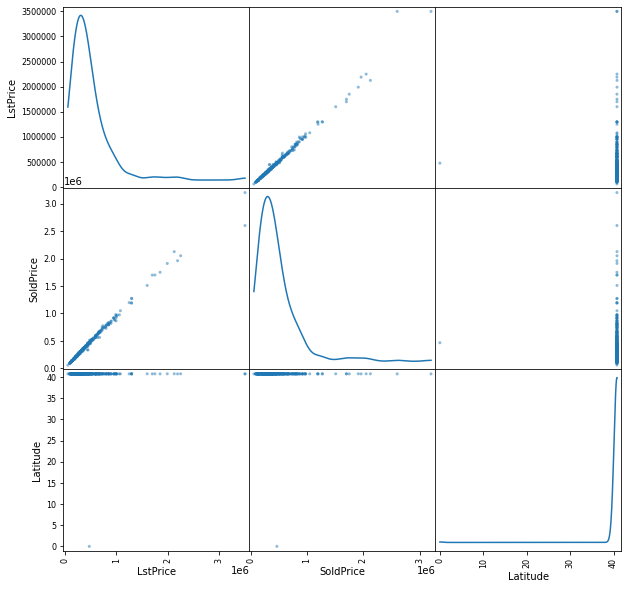

In [96]:
data = price_match

price_map = cleaned_data[["LstPrice", "SoldPrice", "TotSqf", "Latitude"]]

print(price_map.corr())
pd.plotting.scatter_matrix(price_map, figsize=(10, 10), diagonal='kde')
plt.show()

Specific questions:

Often the price per square foot for a house is advertised. Is this what the coefficient for TotSqf is measuring? Provide an interpretation for the coefficient for TotSqf.

Estimate the value that each Garage space adds to a house.
Does latitude or longitude have an impact on house price? Explain.
If we wanted to start a 'house flipping' company, we'd have to be able to do a better job of predicting the sold price than the list price does. How does your model compare?

Task 7: Incorporating a Categorical Variable

Sold Price v TotSqf:

sqf v soldprice + prop_type:

In [102]:
cleaned_data.head(1)

result = sm.ols(formula="SoldPrice ~ TotSqf+PropType", data=cleaned_data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     59.10
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           1.06e-32
Time:                        11:13:20   Log-Likelihood:                -3922.7
No. Observations:                 348   AIC:                             8447.
Df Residuals:                      47   BIC:                             9607.
Df Model:                         300                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   2.25e+05   5.17e+04      4.348      0.000    1.21e+05    3.29e+05
TotSqf[T.1,004]              1.7e+04   8.02e+04      0.212      0.833   -1.44e+05    1.78e+05
TotSqf[T.1,006]            2000.0000   7.32e+04      0.027      0.978   -1.45e+05    1.49e+05
TotSqf[T.1,015]             -1.4e+04   7.32e+04     -0.191      0.849   -1.61e+05    1.33e+05
TotSqf[T.1,031]           -4000.0000   8.02e+04     -0.050      0.960   -1.65e+05    1.57e+05
TotSqf[T.1,044]            1750.0000   6.55e+04      0.027      0.979    -1.3e+05    1.33e+05
TotSqf[T.1,045]              2.1e+04   7.32e+04      0.287      0.775   -1.26e+05    1.68e+05
TotSqf[T.1,060]            -2.16e+04   8.02e+04     -0.269      0.789   -1.83e+05     1.4e+05
TotSqf[T.1,082]              7.1e+04   8.02e+04      0.886      0.380   -9.03e+04    2.32e+05
TotSqf[T.1,085]               -1e+04   7.32e+04     -0.137      0.892   -1.57e+05    1.37e+05
TotSqf[T.1,087]               -6e+04   7.32e+04     -0.820      0.416   -2.07e+05    8.72e+04
TotSqf[T.1,100]           -4.716e+04   5.67e+04     -0.832      0.410   -1.61e+05    6.69e+04
TotSqf[T.1,107]                3e+04   7.32e+04      0.410      0.684   -1.17e+05    1.77e+05
TotSqf[T.1,110]            1500.0000   6.34e+04      0.024      0.981   -1.26e+05    1.29e+05
TotSqf[T.1,120]            -4.58e+04   7.32e+04     -0.626      0.534   -1.93e+05    1.01e+05
TotSqf[T.1,137]               -2e+04   7.32e+04     -0.273      0.786   -1.67e+05    1.27e+05
TotSqf[T.1,150]               -4e+04   7.32e+04     -0.547      0.587   -1.87e+05    1.07e+05
TotSqf[T.1,167]             4.15e+04   5.98e+04      0.695      0.491   -7.87e+04    1.62e+05
TotSqf[T.1,182]             -1.2e+04   7.32e+04     -0.164      0.870   -1.59e+05    1.35e+05
TotSqf[T.1,191]           -7000.0000   8.02e+04     -0.087      0.931   -1.68e+05    1.54e+05
TotSqf[T.1,196]             4.55e+04   8.02e+04      0.568      0.573   -1.16e+05    2.07e+05
TotSqf[T.1,200]            1216.6667   5.59e+04      0.022      0.983   -1.11e+05    1.14e+05
TotSqf[T.1,205]              9.7e+04   7.32e+04      1.325      0.191   -5.02e+04    2.44e+05
TotSqf[T.1,211]             1.31e+05   8.02e+04      1.634      0.109   -3.03e+04    2.92e+05
TotSqf[T.1,225]             -1.5e+04   7.32e+04     -0.205      0.838   -1.62e+05    1.32e+05
TotSqf[T.1,259]                5e+04   7.32e+04      0.683      0.498   -9.72e+04    1.97e+05
TotSqf[T.1,270]              1.5e+05   7.32e+04      2.050      0.046    2771.893    2.97e+05
TotSqf[T.1,290]              2.6e+04   8.02e+04      0.324      0.747   -1.35e+05    1.87e+05
TotSqf[T.1,298]           10000.0000   7.32e+04      0.137      0.892   -1.37e+05    1.57e+05
TotSqf[T.1,300]             -5.5e+04   7.32e+04     -0.752      0.456   -2.

The second model indicates that when you take into account total square footage, property type is no longer predictive. The bottom-most data-points in the set represent condos, and one can see that as the square footage moves up, the price suddenly jumps above that inintial constellation of properties.